# API data overview

Overview of some data from Dimensions and Altmetrics. You will need to download your own copy of the data to replicate this part.

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Dimensions

In [33]:
# load Dimensions data

directory_name = "datasets_output/json_dimensions_cwts"

all_dimensions = list()
for root, dirs, files in os.walk(directory_name):
    for file in files:
        if ".json" in file:
            all_data = codecs.open(os.path.join(root,file)).read()
            for record in all_data.split("\n"):
                if record:
                    all_dimensions.append(json.loads(record))

In [34]:
all_dimensions[0]

{'id': 'pub.1006380292',
 'format': None,
 'status': None,
 'publication_type': 'article',
 'doi': '10.1016/j.vetmic.2014.08.012',
 'pmid': '25217400',
 'pmcid': None,
 'title': 'Cell culture isolation and sequence analysis of genetically diverse US porcine epidemic diarrhea virus strains including a novel strain with a large deletion in the spike gene',
 'year': 2014,
 'publication_date': '2014-10-01',
 'volume': '173',
 'issue': '3-4',
 'pages': '258-269',
 'open_access_versions': [],
 'concepts': {'porcine epidemic diarrhea virus': 1.0,
  'epidemic diarrhea virus': 1.0,
  'diarrhea virus': 1.0,
  'virus': 1.0,
  'Canada': 1.0,
  'Mexico': 1.0,
  'high mortality': 1.0,
  'nursing piglets': 1.0,
  'piglets': 1.0,
  'significant economic losses': 1.0,
  'economic losses': 1.0,
  'loss': 1.0,
  'efficacious preventive measures': 1.0,
  'therapeutic tool': 1.0,
  'tool': 1.0,
  'isolation': 1.0,
  'cell cultures': 1.0,
  'culture': 1.0,
  'first step': 1.0,
  'step': 1.0,
  'development'

In [35]:
df_dimensions = pd.DataFrame.from_dict({
    "id":[r["id"] for r in all_dimensions],
    "publication_type":[r["publication_type"] for r in all_dimensions],
    "doi":[r["doi"] for r in all_dimensions],
    "title":[r["title"] for r in all_dimensions],
    "year":[r["year"] for r in all_dimensions],
    "journal":[r["journal"]["title"] for r in all_dimensions],
    "times_cited":[r["times_cited"] for r in all_dimensions],
    "relative_citation_ratio":[r["relative_citation_ratio"] for r in all_dimensions],
    "for_top":[r["for"][0]["first_level"]["name"] if len(r["for"])>0 else "" for r in all_dimensions],
    "for_bottom":[r["for"][0]["second_level"]["name"] if len(r["for"])>0 else "" for r in all_dimensions],
})

In [45]:
df_dimensions.shape

(47353, 10)

In [36]:
del all_dimensions

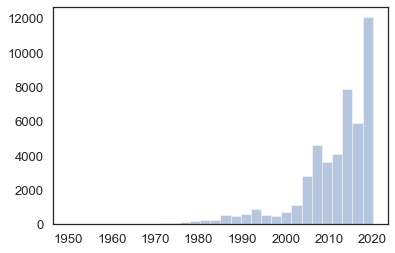

In [37]:
# distribution of time of publication

sns.distplot(df_dimensions.year.tolist(), bins=30, kde=False)

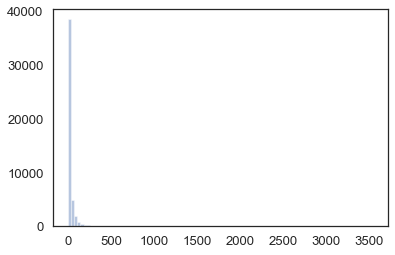

In [38]:
# distribution of times_cited and relative_citation_ratio citations

sns.distplot(df_dimensions.times_cited.tolist(), bins=100, kde=False)

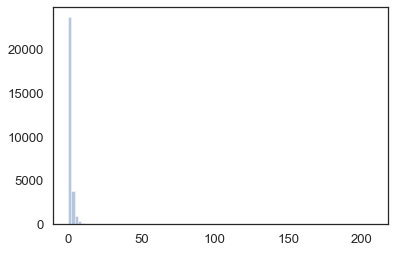

In [39]:
sns.distplot(df_dimensions.relative_citation_ratio.tolist(), bins=100, kde=False)

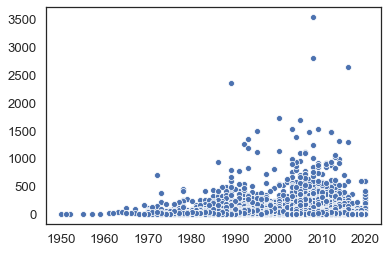

In [40]:
# scatter of citations vs time of publication

sns.scatterplot(df_dimensions.year.to_list(),df_dimensions.times_cited.to_list())

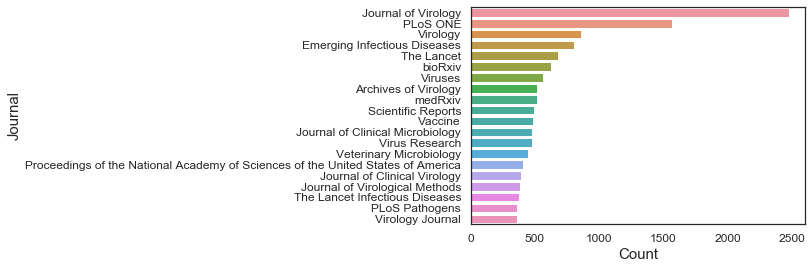

In [52]:
# distribution of journals

df_sub = df_dimensions[df_dimensions.journal.isin(df_dimensions.journal.value_counts()[:20].index.tolist())]
b = sns.countplot(y="journal", data=df_sub, order=df_sub['journal'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Journal",fontsize=15)
b.tick_params(labelsize=12)

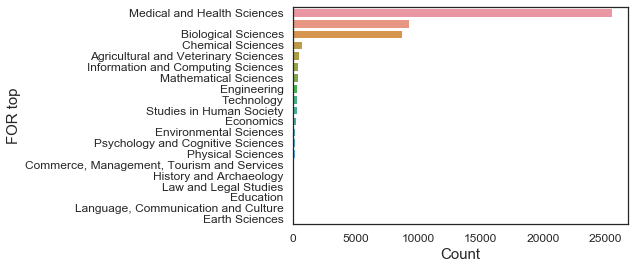

In [53]:
# FOR jeywords distribution

df_sub = df_dimensions[df_dimensions.for_top.isin(df_dimensions.for_top.value_counts()[:20].index.tolist())]
b = sns.countplot(y="for_top", data=df_sub, order=df_sub['for_top'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("FOR top",fontsize=15)
b.tick_params(labelsize=12)

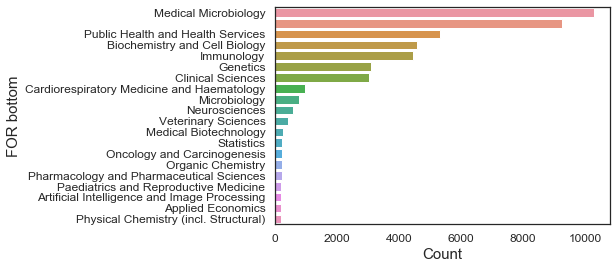

In [54]:
df_sub = df_dimensions[df_dimensions.for_bottom.isin(df_dimensions.for_bottom.value_counts()[:20].index.tolist())]
b = sns.countplot(y="for_bottom", data=df_sub, order=df_sub['for_bottom'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("FOR bottom",fontsize=15)
b.tick_params(labelsize=12)

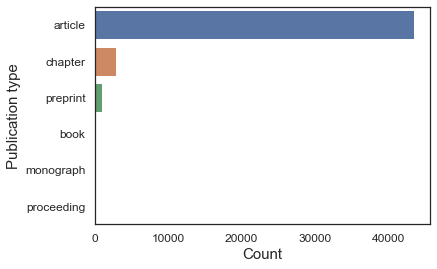

In [51]:
# publication type
df_sub = df_dimensions[df_dimensions.publication_type.isin(df_dimensions.publication_type.value_counts()[:10].index.tolist())]
b = sns.countplot(y="publication_type", data=df_sub, order=df_sub['publication_type'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Publication type",fontsize=15)
b.tick_params(labelsize=12)

### Altmetrics

In [100]:
# load Altmetrics data

# separately export twitter IDs if necessary (to hydrate them)

out_folder = "datasets_output/json_altmetrics_cwts"
all_altmetrics = list()

for root, dirs, files in os.walk(out_folder):
    for file in files:
        if ".json" in file:
            all_altmetrics.append(json.loads(codecs.open(os.path.join(root,file)).read()))

In [101]:
all_altmetrics[1004]

{'altmetric_id': 56726354,
 'counts': {'readers': {'citeulike': '0', 'mendeley': '17', 'connotea': '0'},
  'total': {'posts_count': 3},
  'reddit': {'unique_users_count': 1,
   'unique_users': ['EgweneMalazanEmpire'],
   'posts_count': 1},
  'twitter': {'unique_users_count': 2, 'posts_count': 2}},
 'citation': {'altmetric_jid': '4f6fa6053cf058f610006624',
  'authors': ['G. Canning', 'H. Camphor', 'B. Schroder'],
  'doi': '10.1016/j.jnc.2019.02.001',
  'first_seen_on': '2019-03-08T17:17:18+00:00',
  'handles': [],
  'isbns': [],
  'issns': ['1617-1381'],
  'journal': 'Journal for Nature Conservation',
  'last_mentioned_on': 1553935654,
  'links': ['https://www.sciencedirect.com/science/article/pii/S1617138118301948?dgcid=raven_sd_via_email',
   'https://www.sciencedirect.com/science/article/pii/S1617138118301948'],
  'pubdate': '2019-04-01T00:00:00+00:00',
  'publisher_subjects': [{'name': 'Multidisciplinary', 'scheme': 'era'}],
  'scopus_subjects': ['Environmental Science', 'Physical S

In [102]:
# NB there is a lot we are leaving there for now

df_altmetrics = pd.DataFrame.from_dict({
    "altmetric_id":[r["altmetric_id"] if "altmetric_id" in r.keys() else "" for r in all_altmetrics],
    "counts_mendeley":[r["counts"]["readers"]["mendeley"] if "readers" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_news":[r["counts"]["news"]["posts_count"] if "news" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_twitter_count":[r["counts"]["twitter"]["posts_count"] if "twitter" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_twitter_unique":[r["counts"]["twitter"]["unique_users_count"] if "twitter" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_total":[r["counts"]["total"]["posts_count"] if "total" in r["counts"].keys() else 0 for r in all_altmetrics],
    "doi":[r["citation"]["doi"] if "doi" in r["citation"] else "" for r in all_altmetrics],
    "altmetric_score":[r["altmetric_score"]["score"] for r in all_altmetrics],
    "member_of_the_public":[r["demographics"]["poster_types"]["member_of_the_public"] if "demographics" in r.keys() and isinstance(r["demographics"],dict) and "poster_types" in r["demographics"].keys() and "member_of_the_public" in r["demographics"]["poster_types"].keys() else 0 for r in all_altmetrics],
    "researcher":[r["demographics"]["poster_types"]["researcher"] if "demographics" in r.keys() and isinstance(r["demographics"],dict) and "poster_types" in r["demographics"].keys() and "researcher" in r["demographics"]["poster_types"].keys() else 0 for r in all_altmetrics],
    "science_communicator":[r["demographics"]["poster_types"]["science_communicator"] if "demographics" in r.keys() and isinstance(r["demographics"],dict) and "poster_types" in r["demographics"].keys() and "science_communicator" in r["demographics"]["poster_types"].keys() else 0 for r in all_altmetrics]
})

In [103]:
df_altmetrics.shape

(30396, 11)

In [104]:
del all_altmetrics

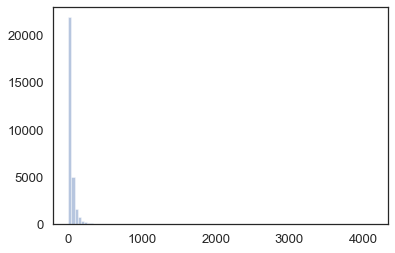

In [87]:
# scores

sns.distplot(df_altmetrics.counts_mendeley.tolist(), bins=100, kde=False)

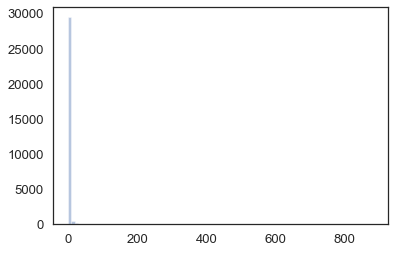

In [88]:
sns.distplot(df_altmetrics.counts_news.tolist(), bins=100, kde=False)

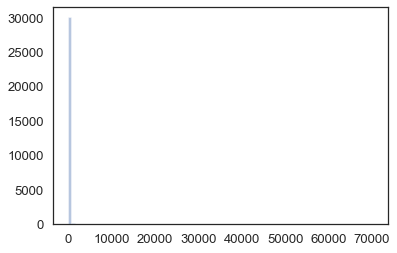

In [89]:
sns.distplot(df_altmetrics.counts_twitter_count.tolist(), bins=100, kde=False)

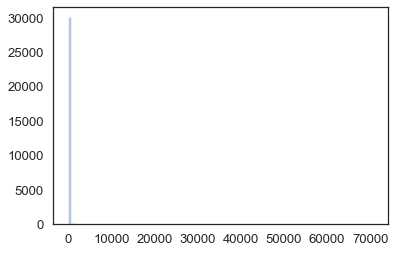

In [90]:
sns.distplot(df_altmetrics.counts_total.tolist(), bins=100, kde=False)

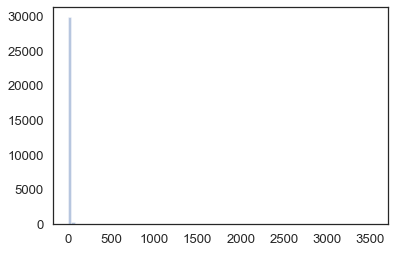

In [93]:
# demographics

sns.distplot(df_altmetrics.researcher.tolist(), bins=100, kde=False)

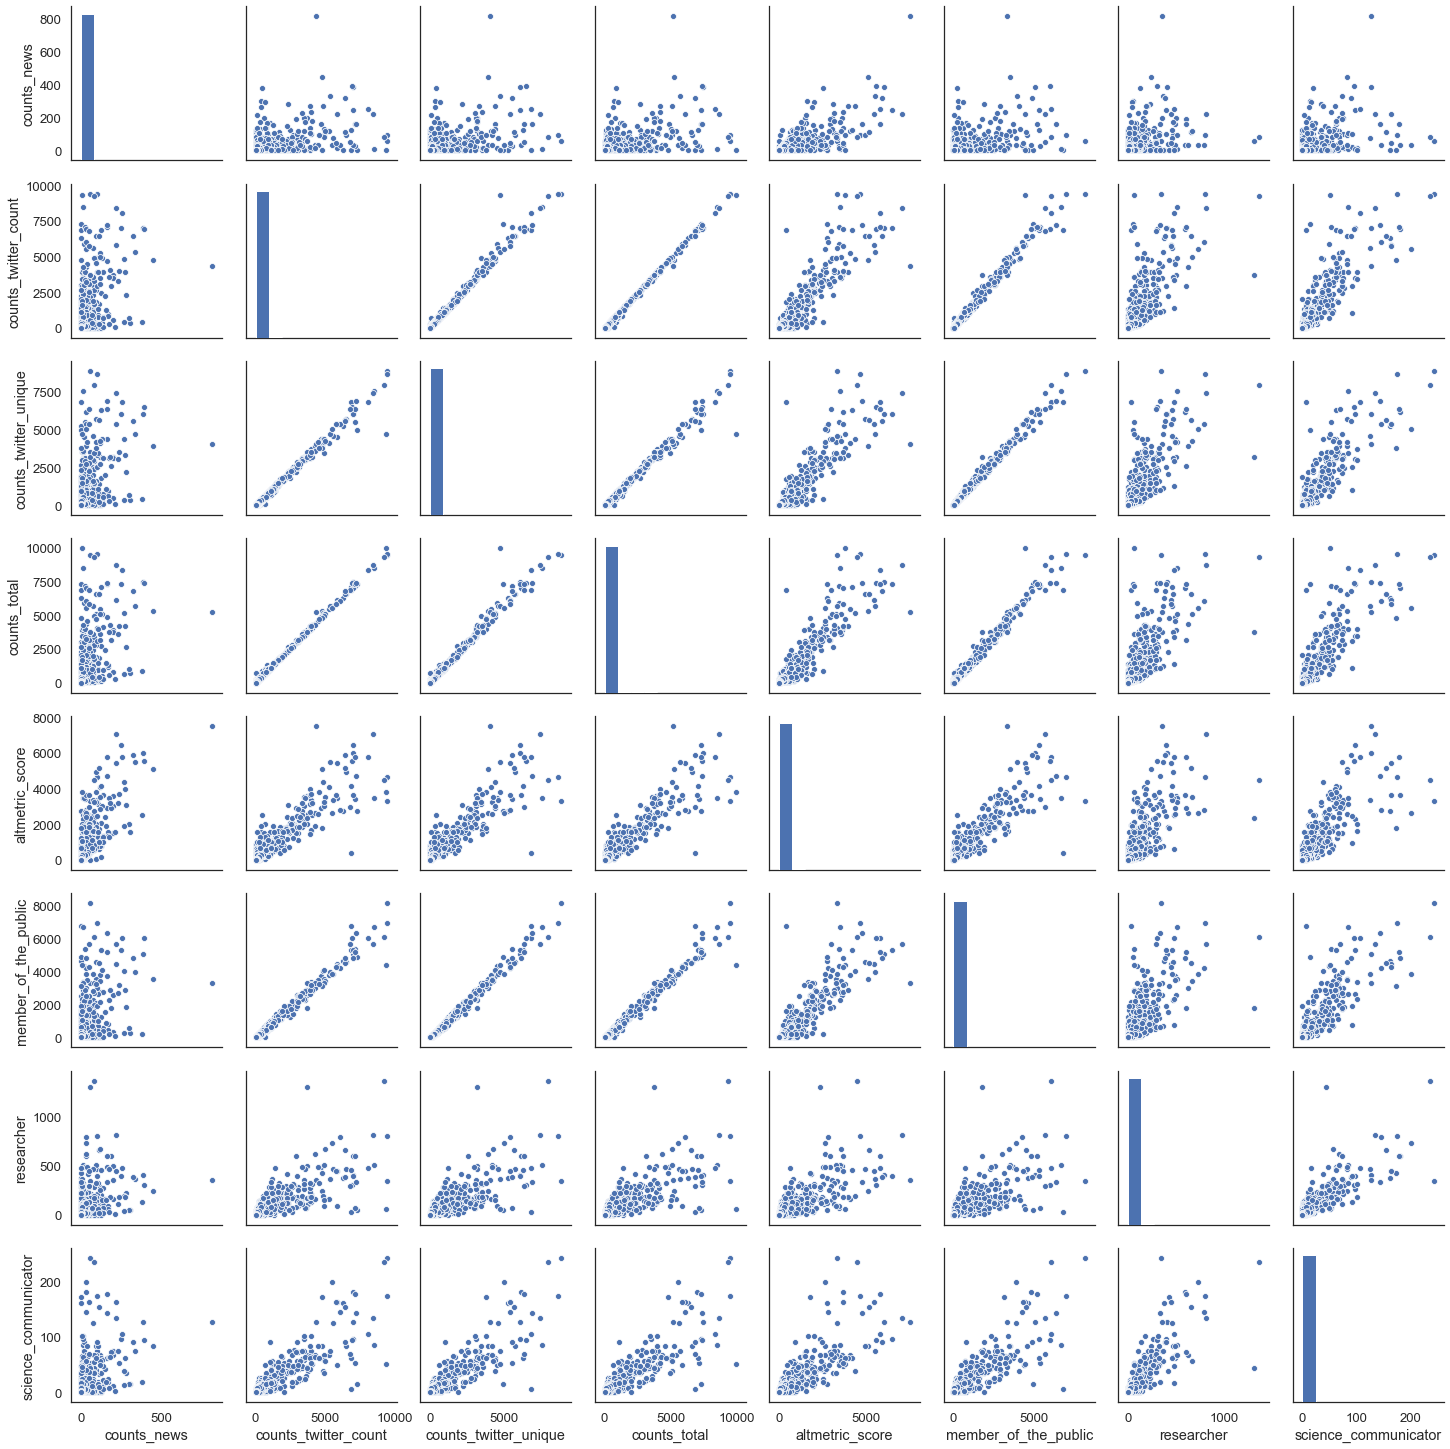

In [106]:
# comparison

sns.pairplot(df_altmetrics[df_altmetrics.counts_total < 10000][["counts_news","counts_twitter_count","counts_twitter_unique","counts_total","altmetric_score","member_of_the_public","researcher","science_communicator"]])